In [1]:
# !pip install vaderSentiment
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#Import sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from api_keys import consumer_key, consumer_secret, access_token, access_token_secret
#
analyzer = SentimentIntensityAnalyzer()

In [2]:
#Instantiate Authentication / Wrapper
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
#Observe 5 different Twitter accounts from Major Media
handles = ['BBC', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

In [4]:
#Create Empty Lists for Tweets
tweets = []
name = []
full_text = []

In [5]:
#Loop through handles and compile last 100 tweets from each
for i in handles:
    tweets = tweepy.Cursor(api.user_timeline, i, tweet_mode='extended').items(100)
    for j in tweets:
        name.append(j.author.name)
        full_text.append(j.full_text)

In [6]:
#Create DataFrame with Tweets
twitter_df = pd.DataFrame({'Name' : name, 'Tweet Text' : full_text})
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
twitter_df

Name  \
0    BBC                  
1    BBC                  
2    BBC                  
3    BBC                  
4    BBC                  
..   ...                  
495  The New York Times   
496  The New York Times   
497  The New York Times   
498  The New York Times   
499  The New York Times   

                                                                                                                                                                                                                                                                                       Tweet Text  
0    Hugh Laurie and Helen McCrory star in a brand new political thriller…\n \n#Roadkill, coming soon to @BBCOne and @BBCiPlayer.\nhttps://t.co/ou7Qt84sUh                                                                                                                                         
1    These specially trained sniffer dogs in Lebanon are learning to detect Covid-19 🐶\nhttps://t.co/9qx0xfvnmj                                                                                                                                                                                    
2    RT @BBCCiN: Here's a sneak peak at our special short film, coming 15 October @BBCOne 🔜 https://t.co/DevFP5ecxT                                                                                                                                                                                
3    "More than 12 million Africans were trafficked. More than 2 million died en route. We thought it was worth telling that story."\n\nIn a new series, @SamuelLJackson and @afuahirsch explore 400 years of slavery.\n\nEnslaved with Samuel L. Jackson | @BBCiPlayer.\nhttps://t.co/DUFuUhPpmA  
4    .@SamuelLJackson pieces together the beginnings and methods of the trans-Atlantic slave trade – a business that thrived for over 400 years.\n\n#Enslaved | 9pm | @BBCTwo &amp; @BBCiPlayer. https://t.co/Od1CIJ8qM5                                                                           
..                                                                                                                                                                                                                   ...                                                                           
495  RT @reidepstein: Long lines in Texas for the first day of early voting come in  first election since Texas GOP forbade straight-ticket voti…                                                                                                                                                  
496  Despite a pandemic that has ravaged New York, the four companies known as Big Tech — Amazon, Apple, Facebook and Google — are all significantly expanding their footprint in the city.\nhttps://t.co/0jpaEaT20R                                                                               
497  RT @evanchill: After a federal task force killed the self-described antifa activist Michael Reinoehl on Sept. 3, President Trump praised it…                                                                                                                                                  
498  In Opinion\n\nBryce Covert writes, "In reality, there is no magical distinction that leaves children and adults immune to the coronavirus in a child care setting but not in a school. And yet throughout the pandemic we’ve operated as if there is."\nhttps://t.co/2FyoFFn8Ul               
499  RT @apoorva_nyc: NEW: Reports of reinfection with the coronavirus, like the one in Nevada, evoke a nightmarish future: Repeat bouts of illn…                                                                                                                                                  

[500 rows x 2 columns]

In [7]:
#Give each tweet an index # that resets once the name of the handle changes
base_name = twitter_df.loc[0,'Name']
counter = 0 
for index, row in twitter_df.iterrows():
    if row['Name'] == base_name:
        twitter_df.loc[index,'Tweets Ago'] = counter
        counter +=1
    if row['Name'] != base_name:
        counter = 0
        twitter_df.loc[index,'Tweets Ago'] = counter
        base_name = row['Name']
        counter +=1

In [8]:
#Analyze the Sentiment of each Tweet
for index, row in twitter_df.iterrows():
    tweet = row['Tweet Text']
    results = analyzer.polarity_scores(f'{tweet}')
    twitter_df.loc[index, 'Compound'] = results['compound']
    twitter_df.loc[index, 'Positive'] = results['pos']
    twitter_df.loc[index, 'Neutral'] = results['neu']
    twitter_df.loc[index, 'Negative'] = results['neg']
twitter_df.head()

Name  \
0  BBC   
1  BBC   
2  BBC   
3  BBC   
4  BBC   

                                                                                                                                                                                                                                                                                     Tweet Text  \
0  Hugh Laurie and Helen McCrory star in a brand new political thriller…\n \n#Roadkill, coming soon to @BBCOne and @BBCiPlayer.\nhttps://t.co/ou7Qt84sUh                                                                                                                                          
1  These specially trained sniffer dogs in Lebanon are learning to detect Covid-19 🐶\nhttps://t.co/9qx0xfvnmj                                                                                                                                                                                     
2  RT @BBCCiN: Here's a sneak peak at our special short film, coming 15 October @BBCOne 🔜 https://t.co/DevFP5ecxT                                                                                                                                                                                 
3  "More than 12 million Africans were trafficked. More than 2 million died en route. We thought it was worth telling that story."\n\nIn a new series, @SamuelLJackson and @afuahirsch explore 400 years of slavery.\n\nEnslaved with Samuel L. Jackson | @BBCiPlayer.\nhttps://t.co/DUFuUhPpmA   
4  .@SamuelLJackson pieces together the beginnings and methods of the trans-Atlantic slave trade – a business that thrived for over 400 years.\n\n#Enslaved | 9pm | @BBCTwo &amp; @BBCiPlayer. https://t.co/Od1CIJ8qM5                                                                            

   Tweets Ago  Compound  Positive  Neutral  Negative  
0  0.0         0.0000    0.000     1.000    0.000     
1  1.0         0.0000    0.000     1.000    0.000     
2  2.0         0.4019    0.137     0.863    0.000     
3  3.0        -0.8807    0.037     0.745    0.218     
4  4.0        -0.4019    0.000     0.912    0.088

In [9]:
#Create Plot Points for Graphs
x = twitter_df.iloc[0:100,2]
#
bbc = twitter_df.loc[twitter_df['Name']=='BBC']['Compound']
cnn = twitter_df.loc[twitter_df['Name']=='CNN']['Compound']
cbs = twitter_df.loc[twitter_df['Name']== 'CBS News']['Compound']
fox = twitter_df.loc[twitter_df['Name']=='Fox News']['Compound']
nyt = twitter_df.loc[twitter_df['Name']=='The New York Times']['Compound']

No handles with labels found to put in legend.


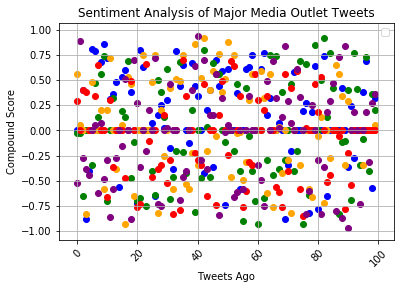

In [10]:
plt.scatter(x,bbc, color = 'blue')
plt.scatter(x,cnn, color = 'green')
plt.scatter(x,cbs, color = 'orange')
plt.scatter(x,fox, color = 'red')
plt.scatter(x,nyt, color = 'purple')
plt.xticks(rotation = 45)
plt.title('Sentiment Analysis of Major Media Outlet Tweets')
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Score")
plt.grid(True)
plt.legend()
plt.savefig('output/tweepy/SentimentbyTweet')

In [11]:
polarity = twitter_df.groupby(['Name']).mean()["Compound"]
pd.DataFrame(polarity)

Compound
Name                        
BBC                 0.134407
CBS News            0.045979
CNN                -0.003886
Fox News           -0.058960
The New York Times -0.052471

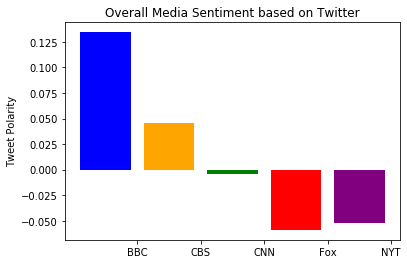

In [12]:
fig, ax = plt.subplots()
x = np.arange(len(polarity))
bbc = ax.bar(x[0], polarity[0], color = 'blue')
cbs = ax.bar(x[1], polarity[1], color = 'orange')
cnn = ax.bar(x[2], polarity[2], color = 'green')
fox = ax.bar(x[3], polarity[3], color = 'red')
nyt = ax.bar(x[4], polarity[4], color = 'purple')
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter")
ax.set_xticks(x + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.grid(False)
plt.savefig('output/tweepy/OverallSentiment')

In [13]:
#FoxNews does NOT put text in their tweets - only links to articles. Therefore VADER cannot assign a score